### 1. Importing dataset and preparation of data 

#### 1.1 Import modules

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

<IPython.core.display.Javascript object>

#### 1.2. Load dataset 

In [2]:
# get data from https://github.com/amanthedorkknight/fifa18-all-player-statistics/

import requests
import os

def download_file(url, filename, path='data'):
    ''' Downloads file from the url and save it as filename '''
    # put file into data folder
    if not os.path.exists(path):
        os.mkdir(path)
        response = requests.get(url)
        # Check if the response is ok (200)
        if response.status_code == 200:
            # Open file and write the content
            with open(os.path.join(path, filename), 'wb') as file:
                # A chunk of 128 bytes
                for chunk in response:
                    file.write(chunk)

If getting back html response , not raw csv, you should use the url given by the Raw link in the github page for getting raw csv respons

In [3]:
# download it
url = 'https://raw.githubusercontent.com/amanthedorkknight/fifa18-all-player-statistics/master/Complete/CompleteDataset.csv'
filename = 'fifa2018.csv'
download_file(url, filename)
print('Saved')

Saved


In [4]:
# load csv file to pandas dataframe
path = 'data'
fifa = pd.read_csv(os.path.join(path, 'fifa2018.csv'),low_memory=False)

#### 1.3. Summary of the data

In [5]:
# see what's there
fifa.head()

Unnamed: 0               Name  Age  \
0           0  Cristiano Ronaldo   32   
1           1           L. Messi   30   
2           2             Neymar   25   
3           3          L. Suárez   30   
4           4           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo  ...   \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  ...    
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  ...    
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png  ...    
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  ...    
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png  ...    

     RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0  61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1  57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2  59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3  64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 75 columns]

In [6]:
# get info on df
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

Getting to know the data - columns, number of unique values and data type

In [7]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(fifa)

Unnamed: 0 | 17981 | int64
Name | 16975 | object
Age | 29 | int64
Photo | 17929 | object
Nationality | 165 | object
Flag | 165 | object
Overall | 49 | int64
Potential | 48 | int64
Club | 648 | object
Club Logo | 679 | object
Value | 207 | object
Wage | 142 | object
Special | 1396 | int64
Acceleration | 161 | object
Aggression | 151 | object
Agility | 146 | object
Balance | 135 | object
Ball control | 184 | object
Composure | 161 | object
Crossing | 176 | object
Curve | 153 | object
Dribbling | 194 | object
Finishing | 187 | object
Free kick accuracy | 136 | object
GK diving | 100 | object
GK handling | 97 | object
GK kicking | 103 | object
GK positioning | 99 | object
GK reflexes | 102 | object
Heading accuracy | 158 | object
Interceptions | 174 | object
Jumping | 140 | object
Long passing | 188 | object
Long shots | 156 | object
Marking | 183 | object
Penalties | 117 | object
Positioning | 171 | object
Reactions | 158 | object
Short passing | 209 | object
Shot power | 153 | object
Sli

#### 1.4. Data preparation

It seems there are some missing values in the 'Club' column. We are going to drop them since there are just a few of them

In [8]:
# drop rows of the Club columns that missing values
fifa = fifa.dropna(subset = ['Club'])

There are still some missing values in df, and they all belong to player's playing position. 

In [9]:
# Rather then delete, we use .mean to fill in missing values
'''not sure if this is correct'''
fifa = fifa.fillna(fifa.mean().round()) 

In [10]:
# drop columns we dont need
fifa.drop(['Photo', 'Special', 'Composure', "Unnamed: 0", \
           'Crossing', 'Curve','CAM', 'CB', \
           'CF', 'CM','LAM', 'GK diving', 'GK handling',\
           'GK kicking','GK positioning', 'GK reflexes', \
           'Marking', 'Positioning', 'CDM', 'RWB', 'ST',\
           'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'ID', \
           'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', \
           'RCM', 'RDM', 'RF', 'RM','RS', 'RW', \
           ], axis=1, inplace=True)

In [11]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club',
       'Club Logo', 'Value', 'Wage', 'Acceleration', 'Aggression', 'Agility',
       'Balance', 'Ball control', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Penalties', 'Reactions', 'Short passing',
       'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina',
       'Standing tackle', 'Strength', 'Vision', 'Volleys',
       'Preferred Positions'],
      dtype='object')

#### 1.4.1 Cleaning data in columns 

In [12]:
# money function - convert mils and thousands and removes K and M
def convert(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else :
        return float(amount[1:])

In [13]:
# run money function
fifa['Value'] = fifa['Value'].apply(lambda x: convert(x))
fifa['Wage'] = fifa['Wage'].apply(lambda x: convert(x))

In [14]:
# adding "future potential" column
fifa['Future Potential'] = fifa['Potential'] - fifa['Overall']

In [15]:
# Dictionary of countries for each continent
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

In [16]:
# Function matching continent to countries
def find_continent(x, continents_list):
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

# creating new column "Continent"
fifa['Continent'] = fifa['Nationality'].apply(lambda x: find_continent(x, continents))

In [17]:
# get only one preferred position (first only)
fifa['Position'] = fifa['Preferred Positions'].str.split().str[0]

In [18]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club',
       'Club Logo', 'Value', 'Wage', 'Acceleration', 'Aggression', 'Agility',
       'Balance', 'Ball control', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Penalties', 'Reactions', 'Short passing',
       'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina',
       'Standing tackle', 'Strength', 'Vision', 'Volleys',
       'Preferred Positions', 'Future Potential', 'Continent', 'Position'],
      dtype='object')

#### 1.4.2 Re-indexing the Columns

Let's move some of the personal attributes to the front of the dataframe in order too facilitate slicing and set them in preferred order.

In [19]:
# reorder columns
reindex_cols = []
personal_cols = []
attributes_cols = []

personal_cols = ['Name', 'Age', 'Nationality', 'Continent','Flag', 'Overall', 'Potential','Future Potential', 'Club',
       'Value', 'Wage', 'Position']

attributes_cols = ['Acceleration', 'Aggression', 'Agility',
       'Balance', 'Ball control', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Penalties', 'Reactions', 'Short passing',
       'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina',
       'Standing tackle', 'Strength', 'Vision', 'Volleys']

reindex_cols = personal_cols + attributes_cols

df = fifa[reindex_cols]
df = df.dropna()
df.head()

Name  Age Nationality      Continent  \
0  Cristiano Ronaldo   32    Portugal         Europe   
1           L. Messi   30   Argentina  South America   
2             Neymar   25      Brazil  South America   
3          L. Suárez   30     Uruguay  South America   
4           M. Neuer   31     Germany         Europe   

                                  Flag  Overall  Potential  Future Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94                 0   
1  https://cdn.sofifa.org/flags/52.png       93         93                 0   
2  https://cdn.sofifa.org/flags/54.png       92         94                 2   
3  https://cdn.sofifa.org/flags/60.png       92         92                 0   
4  https://cdn.sofifa.org/flags/21.png       92         92                 0   

                  Club        Value   ...    Reactions Short passing  \
0       Real Madrid CF   95500000.0   ...           96            83   
1         FC Barcelona  105000000.0   ...           95            88   
2  Paris Saint-Germain  123000000.0   ...           88            81   
3         FC Barcelona   97000000.0   ...           93            83   
4     FC Bayern Munich   61000000.0   ...           85            55   

  Shot power Sliding tackle Sprint speed Stamina Standing tackle Strength  \
0         94             23           91      92              31       80   
1         85             26           87      73              28       59   
2         80             33           90      78              24       53   
3         87             38           77      89              45       80   
4         25             11           61      44              10       83   

  Vision Volleys  
0     85      88  
1     90      85  
2     80      83  
3     84      88  
4     70      11  

[5 rows x 36 columns]

#### 1.4.3 Adding categories for age

In [20]:
age_categories = ['Teen', 'Very Young',
                         'Mid 20th','Prime Time',
                         'Mature Age']



df['Age bins'] = pd.qcut(df['Age'], 5, age_categories)
print(age_categories)


['Teen', 'Very Young', 'Mid 20th', 'Prime Time', 'Mature Age']


#### 1.4.4. Add two additional columns: 'ValueCategory' and 'WageCategory'. 
Use these collumns to divide players into ten classes based on their income and value

In [21]:
max_value = df['Value'].max() + 1
max_wage = df['Wage'].max() + 1

# function for creating category columns 'ValueCategory' and 'WageCategory'
def mappingAmount(x, max_amount):
    for i in range(0, 10):
        if x >= max_amount/10*i and x < max_amount/10*(i+1):
            return i
        
df['ValueCategory'] = df['Value'].apply(lambda x: mappingAmount(x, max_value))
df['WageCategory'] = df['Wage'].apply(lambda x: mappingAmount(x, max_wage))

### 2. Visuals

#### 2.1. Players value by Continent

In [22]:
data = [go.Bar(
    x=fifa['Continent'],  
    y=fifa['Value']
)]
layout = go.Layout(
    title='Players value by Continent'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


#### 2.2 Top teams by players with overall skill > 86

In [23]:
print(df['Overall'].max())

94


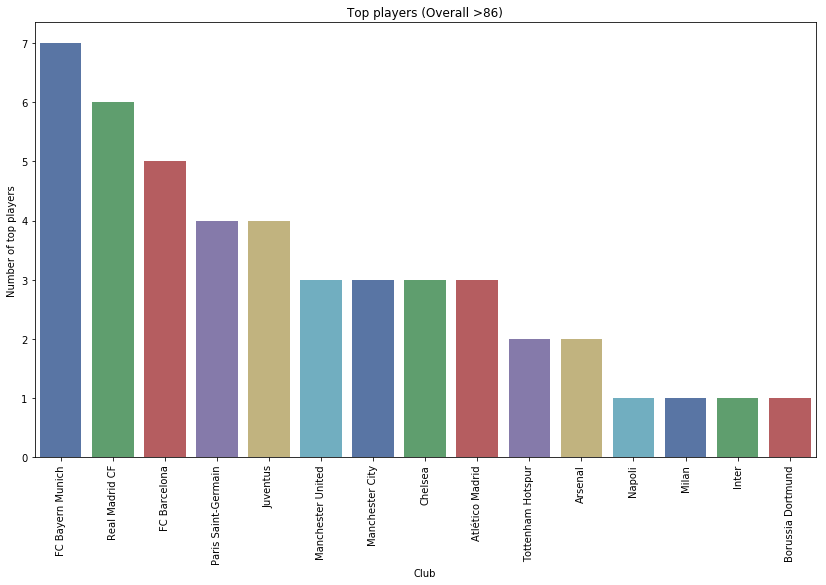

In [24]:
skill = 86
plt.figure(figsize=(14,8))

best = df[df['Overall'] > skill]
grouped = best.groupby('Club')
count_by_club = grouped.count()['Name'].sort_values(ascending = False)

ax = sns.countplot(x = 'Club', data = best, order = count_by_club.index, palette = 'deep')


ax.set_xticklabels(labels = count_by_club.index, rotation='vertical')
ax.set_ylabel('Number of top players')
ax.set_xlabel('Club')
ax.set_title('Top players (Overall >%.i)' %skill)

#### 2.3. Top teams by players with potential > 90

In [25]:
print(df['Potential'].max())

94


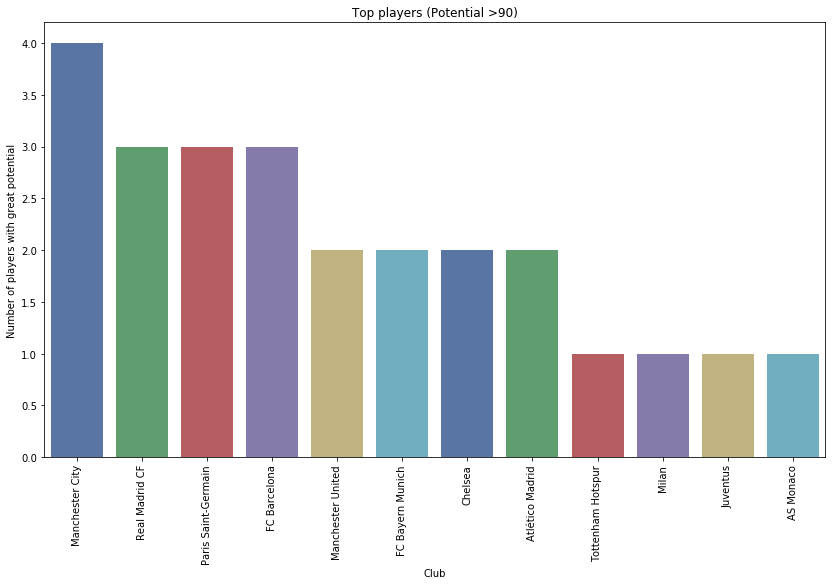

In [26]:
skill = 90
plt.figure(figsize=(14,8))

best = df[df['Potential']>skill]
grouped = best.groupby('Club')
count_by_club = grouped.count()['Name'].sort_values(ascending = False)

ax = sns.countplot(x = 'Club', data = best, order = count_by_club.index, palette = 'deep')


ax.set_xticklabels(labels = count_by_club.index, rotation='vertical')
ax.set_ylabel('Number of players with great potential')
ax.set_xlabel('Club')
ax.set_title('Top players (Potential >%.i)' %skill)

#### 2.4. Grouping by Age

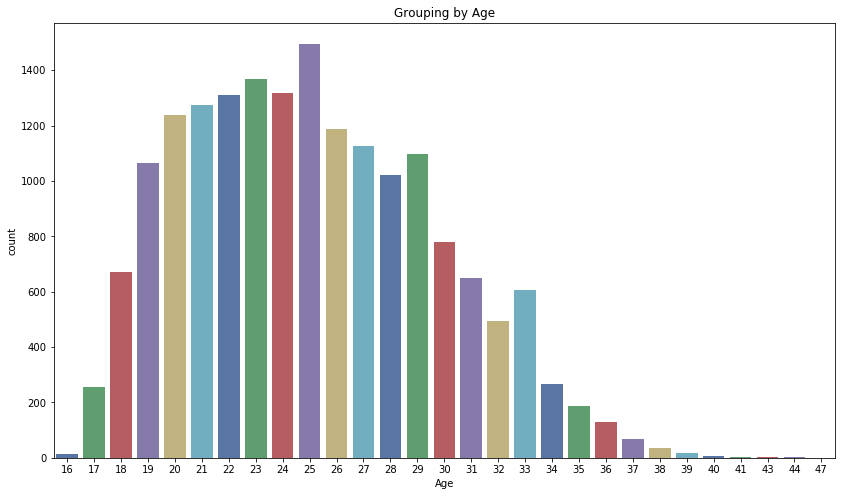

In [27]:
plt.figure(figsize=(14,8))
plt.title('Grouping by Age')
plt.xlabel('Age')
sns.countplot(x='Age',data = df,palette = 'deep')


#### 2.5. Grouping by Continent

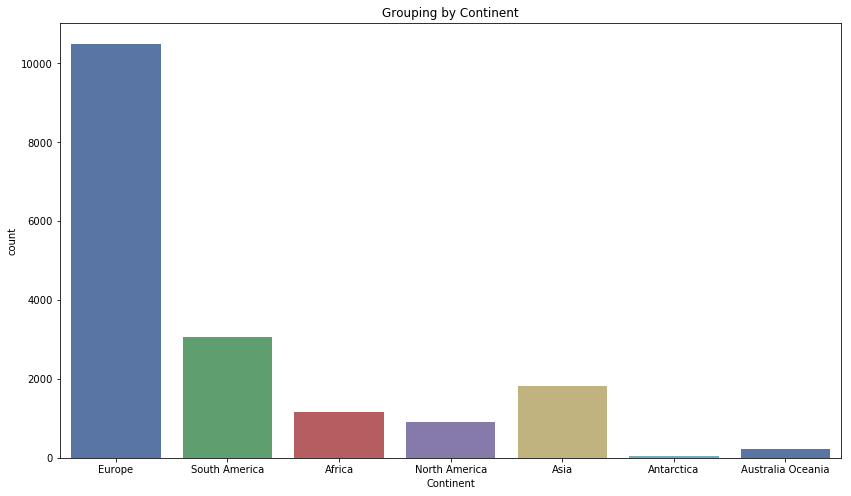

In [28]:
plt.figure(figsize=(14,8))
plt.title('Grouping by Continent')
plt.xlabel('Continent')
sns.countplot(x='Continent',data = df,palette = 'deep')

#### 2.6.  Overall vs Wage and Value

In [29]:
# Selecting unique Overall from DataFrame
overall = df.sort_values('Overall')['Overall'].unique()

overall_wage = df.groupby(['Overall'])['Wage'].mean()
overall_wage = overall_wage.apply(lambda x: x/1000).values

overall_value = df.groupby(['Overall'])['Value'].mean()
overall_value = overall_value.apply(lambda x: x/1000000).values

# create traces

trace1 = go.Scatter(
    x = overall,
    y = overall_wage,
    mode = 'lines+markers',
    name = 'Wage (K)'
)
trace2 = go.Scatter(
    x = overall,
    y = overall_value,
    mode = 'lines+markers',
    name = 'Value (M)'
)
data = [trace1, trace2]  # assign traces to data
layout = go.Layout(
    title = 'Overall vs Wage/Value'
)
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [30]:
# run this in terminal to start jupyter notebook
#jupyter notebook --NotebookApp.iopub_data_rate_limit=2147483647

### Bar

#### 2.7. Club value

In [31]:
top_teams = df.groupby("Club").sum().sort_values("ValueCategory", ascending=False).head(20).reset_index()[["Club", "Overall", "Future Potential", "ValueCategory"]]

In [32]:
#create traces

trace1 = go.Bar(
    x = top_teams["Club"].tolist(),
    y = top_teams["Overall"].tolist(),
    name='Club Overall',
#     marker=dict(
#         color='rgba(55, 128, 191, 0.7)',
#         line=dict(
#             color='rgba(55, 128, 191, 1.0)',
#             width=2,
#         )
#     )
)

trace2 = go.Bar(
    x = top_teams["Club"].tolist(),
    y = top_teams["Future Potential"].tolist(),
    name='Club Potential',
#     marker=dict(
#         color='rgba(219, 64, 82, 0.7)',
#         line=dict(
#             color='rgba(219, 64, 82, 1.0)',
#             width=2,
#         )
#     )
)

trace3 = go.Scatter(
    x = top_teams["Club"].tolist(),
    y = (top_teams["ValueCategory"]).tolist(),
    name='Club Value',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2,trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Club Value',
    titlefont=dict(size=25),
    width=850,
    height=500,
#     paper_bgcolor='rgb(244, 238, 225)',
#     plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Club Overall/Potential',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Club Name'),
    yaxis2=dict(
        title='Club Value',
#         titlefont=dict(
#             color='rgb(148, 103, 189)'
#         ),
#         tickfont=dict(
#             color='rgb(148, 103, 189)'
#         ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 200
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### 2.8. Overall vs Age

In [33]:
# data = [go.Scatter(
#             x=df['Overall'],
#             y=df['Age'],
#             text=df['Name'] + ' | ' + 'Club: ' + df['Club'],  # use the new column for the hover text
#             mode='markers',
#             marker=dict(size=0.25*df['Age'])
#     )]
# layout = go.Layout(
#     title='Overall vs Age',
#     xaxis = dict(title = 'Overall'),
#     yaxis = dict(title = 'Age'),
#     hovermode='closest'
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

trace1 = go.Bar(
    x=df['Continent'],  
    y=df['Age bins'] =='Mature Age',
    name = 'Mature Age',
    marker=dict(color='#FFD700') # set the marker color to gold
)
trace2 = go.Bar(
    x=df['Continent'],  
    y=df['Age bins'] =='Mid 20th',
    name = 'Mid 20th',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace3 = go.Bar(
    x=df['Continent'],  
    y=df['Age bins'] =='Prime Time',
    name = 'Prime Time',
    marker=dict(color='#CD7F42') # set the marker color to bronze
)
trace4 = go.Bar(
    x=df['Continent'],  
    y=df['Age bins'] =='Very Young',
    name = 'Very Young',
    marker=dict(color='#CD7F52') # set the marker color to bronze
)
trace5 = go.Bar(
    x=df['Continent'],  
    y=df['Age bins'] =='Teen',
    name = 'Teen',
    marker=dict(color='#CD7F92') # set the marker color to bronze
)
data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title='Age of players by Continent',
    #barmode='stack'
)
    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Scatter

data = [go.Scatter(          # start with a normal scatter plot
    x=df['Age'],
    y=df['Overall'],
    text=df['Name'],
    mode='markers',
    marker=dict(size=5*df['ValueCategory']) # set the marker size
)]

layout = go.Layout(
    title='Overall vs. Age',
    xaxis = dict(title = 'Age'), # x-axis label
    yaxis = dict(title = 'Overall'),        # y-axis label
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout) 
py.iplot(fig)

### Histogram

In [34]:
print(df['ValueCategory'].unique())

[7 8 9 4 5 6 3 0 2 1]


data = [go.Histogram(
    x=df[df['ValueCategory']==0]['Overall'],
    opacity=0.75,
    name='0'
),
go.Histogram(
    x=df[df['ValueCategory']==1]['Overall'],
    opacity=0.75,
    name='1'
),
go.Histogram(
    x=df[df['ValueCategory']==2]['Overall'],
    opacity=0.75,
    name='2'
),
go.Histogram(
    x=df[df['ValueCategory']==3]['Overall'],
    opacity=0.75,
    name='3'
),
go.Histogram(
    x=df[df['ValueCategory']==4]['Overall'],
    opacity=0.75,
    name='4'
),
go.Histogram(
    x=df[df['ValueCategory']==5]['Overall'],
    opacity=0.75,
    name='5'
),
go.Histogram(
    x=df[df['ValueCategory']==6]['Overall'],
    opacity=0.75,
    name='6'
),
go.Histogram(
    x=df[df['ValueCategory']==7]['Overall'],
    opacity=0.75,
    name='7'
),
go.Histogram(
    x=df[df['ValueCategory']==8]['Overall'],
    opacity=0.75,
    name='8'
),
go.Histogram(
    x=df[df['ValueCategory']==9]['Overall'],
    opacity=0.75,
    name='9'
)]

layout = go.Layout(
    barmode='overlay',
    title="Value comparison by Overall"
)    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

trace1 = go.Bar(
    x = top_teams["Club"].tolist(),
    y = top_teams["Overall"].tolist(),
    name='Team Overall',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = top_teams["Club"].tolist(),
    y = top_teams["PotentialPoints"].tolist(),
    name='Team Potential',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = top_teams["Club"].tolist(),
    y = (top_teams["ValueNum"] / 1000000).tolist(),
    name='Team Value [M€]',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2,trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Is it really worth it?',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Team Overall/Potential',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Club Name'),
    yaxis2=dict(
        title='Team Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 200
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [35]:
df.head()

Name  Age Nationality      Continent  \
0  Cristiano Ronaldo   32    Portugal         Europe   
1           L. Messi   30   Argentina  South America   
2             Neymar   25      Brazil  South America   
3          L. Suárez   30     Uruguay  South America   
4           M. Neuer   31     Germany         Europe   

                                  Flag  Overall  Potential  Future Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94                 0   
1  https://cdn.sofifa.org/flags/52.png       93         93                 0   
2  https://cdn.sofifa.org/flags/54.png       92         94                 2   
3  https://cdn.sofifa.org/flags/60.png       92         92                 0   
4  https://cdn.sofifa.org/flags/21.png       92         92                 0   

                  Club        Value     ...       Sliding tackle Sprint speed  \
0       Real Madrid CF   95500000.0     ...                   23           91   
1         FC Barcelona  105000000.0     ...                   26           87   
2  Paris Saint-Germain  123000000.0     ...                   33           90   
3         FC Barcelona   97000000.0     ...                   38           77   
4     FC Bayern Munich   61000000.0     ...                   11           61   

  Stamina Standing tackle Strength Vision Volleys    Age bins ValueCategory  \
0      92              31       80     85      88  Mature Age             7   
1      73              28       59     90      85  Mature Age             8   
2      78              24       53     80      83    Mid 20th             9   
3      89              45       80     84      88  Mature Age             7   
4      44              10       83     70      11  Mature Age             4   

  WageCategory  
0            9  
1            9  
2            4  
3            9  
4            4  

[5 rows x 39 columns]

In [36]:
print(df['Continent'].unique())

['Europe' 'South America' 'Africa' 'North America' 'Asia' 'Antarctica'
 'Australia Oceania']


### Bokeh

In [37]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, BoxSelectTool, PanTool, ColumnDataSource

#### Overall vs Age

In [38]:
#adding color
colormap = {'Europe':'red', 'South America':'brown', 'Africa':'black', 
            'North America':'blue', 'Asia':'orange', 'Antarctica':'grey',
            'Australia Oceania':'purple'}
df['color'] = [colormap[x] for x in df['Continent']]

# changing size
df['size'] = df['Age'] / 4

#running bokeh in notebook
output_notebook()

Loading BokehJS ...

In [39]:
Europe = ColumnDataSource(df[df['Continent']=='Europe'])
SA = ColumnDataSource(df[df['Continent']=='South America'])
Africa = ColumnDataSource(df[df['Continent']=='Africa'])
NA = ColumnDataSource(df[df['Continent']=='North America'])
Asia = ColumnDataSource(df[df['Continent']=='Asia'])
Antarctica = ColumnDataSource(df[df['Continent']=='Antarctica'])
Australia = ColumnDataSource(df[df['Continent']=='Australia Oceania'])

In [40]:
# create figure object
f = figure()

# adding glyphs
f.circle(x='Overall', y='Age', legend='Europe', color='color', source=Europe, size='size',fill_alpha=0.2)
f.circle(x='Overall', y='Age', legend='South America', color='color', source=SA, size='size',fill_alpha=0.2)
f.circle(x='Overall', y='Age', legend='Africa', color='color', source=Africa, size='size',fill_alpha=0.2)
f.circle(x='Overall', y='Age', legend='North America', color='color', source=NA, size='size',fill_alpha=0.2)
f.circle(x='Overall', y='Age', legend='Asia', color='color', source=Asia, size='size',fill_alpha=0.2)
f.circle(x='Overall', y='Age', legend='Antarctica', color='color', source=Antarctica, size='size',fill_alpha=0.2)
f.circle(x='Overall', y='Age', legend='Australia Oceania', color='color', source=Australia, size='size',fill_alpha=0.2)
    
# style
f.title.text = "Overall vs Age"
f.title.align = 'center'
f.xaxis.axis_label = 'Overall'
f.yaxis.axis_label = 'Age'
f.legend.background_fill_alpha = 0
f.legend.border_line_color = None
f.plot_width = 780
f.plot_height = 600

hover = HoverTool(tooltips=[('Name','@Name'),('Club','@Club')])
f.add_tools(hover)

# write plot in the figure object
show(f)

In [64]:
age_bins_count = df.groupby('Age bins')['Age'].apply(lambda x: len(x.unique()))
age_bins_count

Age bins
Teen           6
Very Young     2
Mid 20th       3
Prime Time     3
Mature Age    15
Name: Age, dtype: int64

In [67]:
age_bins = df.groupby(['Age bins','Age']).size().reset_index()
age_bins.rename(columns={0: 'Count'}, inplace=True)
#age_bins.set_index('Age bins', inplace=True)
age_bins.head()

Age bins  Age  Count
0     Teen   16     13
1     Teen   17    257
2     Teen   18    672
3     Teen   19   1064
4     Teen   20   1238

In [68]:
age_bins_pivot = test.pivot_table(index=['Age bins'], columns='Age', values='Count')

### EZHC

In [ ]:
import ezhc as hc

In [71]:
g = hc.Highcharts()

g.chart.type = 'column'
g.chart.width = 800
g.chart.height = 400
#g.plotOptions.column.animation = False

g.title.text = 'Age bins broken down to age'
g.yAxis.title.text = 'Count of Age'

g.xAxis.categories = list(age_bins_pivot.index)
g.series = hc.build.series(age_bins_pivot)

g.plotOptions.column.stacking = 'normal'

g.plot()